In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import sklearn
import nltk
from sklearn.preprocessing import OneHotEncoder



Loading and Initial Inspection

In [2]:
# loading dataset
data = pd.read_csv('dataset.csv')
data.head()


,FullName,Gender,Major,Description,Personality,Interests,Communication_Style,Looking_for,Favorite_Subject,Study_Location,Study_Time
0,Chu Hoàng Việt,Male,DS,"Yêu màu hồng, ghét sự giả dối",ENFJ,"V-pop, Volleyball, Board games",Text message,NaN,"Calculus, Linear Algebra, Artificial Intelligence","Café, Library",Early Morning
1,Nguyễn Hoài Anh,Male,ICT,oke hế lô và hi xin chào các bạn mình là justx...,ENTP,"EDM, Board games, DIY, Movie, Netflix",Text message,Chit Chatting,"Calculus, Chemistry, Programming","Café, Home, Online",Midday
2,Nguyễn Hoằng Phát,Male,ICT,Thành tựu lớn nhất đời tôi: làm bạn Xoài 🥰,ESFP,"Football, Cooking, Food tour, Travel, Rap",In-person (face-to-face),Share knowledge,Programming,Home,Night
3,Nguyễn Hoàng Lân,Male,ICT,"Đẹp zai, học giỏi, giàu, ga lăng, tinh tế, hài...",ENTP,"K-pop, Ballet, Dancing, Singing, Makeup",Video call,Chit Chatting,"Programming, Artificial Intelligence","Café, Bookstore",Overnight
4,Đặng Trần Tiến,Male,Pharmacy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = data.copy()
df.drop(columns=["FullName", "Gender", "Description"], inplace=True)
df

,Major,Personality,Interests,Communication_Style,Looking_for,Favorite_Subject,Study_Location,Study_Time
0,DS,ENFJ,"V-pop, Volleyball, Board games",Text message,NaN,"Calculus, Linear Algebra, Artificial Intelligence","Café, Library",Early Morning
1,ICT,ENTP,"EDM, Board games, DIY, Movie, Netflix",Text message,Chit Chatting,"Calculus, Chemistry, Programming","Café, Home, Online",Midday
2,ICT,ESFP,"Football, Cooking, Food tour, Travel, Rap",In-person (face-to-face),Share knowledge,Programming,Home,Night
3,ICT,ENTP,"K-pop, Ballet, Dancing, Singing, Makeup",Video call,Chit Chatting,"Programming, Artificial Intelligence","Café, Bookstore",Overnight
4,Pharmacy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1630,Pharmacy,ESTP,"Dancing, Anime",Text message,Study supporter,"Chemistry, Health Care","Bookstore, Café",Early Morning
1631,AE,ENFJ,"Board games, K-pop",In-person (face-to-face),Study supporter,"Calculus, Physics, Programming","Library, Home, Café",Overnight
1632,AMS,INFP,"Badminton, Investment, Swimming, Study, Korean...",Video call,Share knowledge,"Chemistry, Biology",Café,Midnight
1633,AMS,INTP,"Makeup, Anime, Politics, Board games",Text message,Study supporter,Biology,Café,Midday


In [4]:
# fill NaN values with unknown
data = data.fillna('unknown')
dataset = data.copy()


In [5]:
# one-hot encoding data
encoder = OneHotEncoder(sparse_output=False)
categorical_col = ['Gender', 'Major','Personality', 'Interests','Looking_for','Communication_Style', 'Favorite_Subject','Study_Location', 'Study_Time']
encoded_data = encoder.fit_transform(dataset[categorical_col])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_col))

data_encoded = pd.concat([dataset.drop(columns=categorical_col), encoded_df], axis=1)

In [6]:
# data_encoded.drop(columns=['FullName','Description'], inplace=True)
data_encoded

,FullName,Description,Gender_Female,Gender_Male,Gender_Prefer not to say,Major_AE,Major_AES,Major_AMS,Major_ATE,Major_BIT,...,"Study_Location_Online, Library, Café","Study_Location_Online, Library, Home",Study_Location_unknown,Study_Time_Early Morning,Study_Time_Evening,Study_Time_Midday,Study_Time_Midnight,Study_Time_Night,Study_Time_Overnight,Study_Time_unknown
0,Chu Hoàng Việt,"Yêu màu hồng, ghét sự giả dối",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Nguyễn Hoài Anh,oke hế lô và hi xin chào các bạn mình là justx...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Nguyễn Hoằng Phát,Thành tựu lớn nhất đời tôi: làm bạn Xoài 🥰,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Nguyễn Hoàng Lân,"Đẹp zai, học giỏi, giàu, ga lăng, tinh tế, hài...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Đặng Trần Tiến,unknown,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,Nguyễn Lê Minh Thy,unknown,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1631,Nguyễn Thanh Trà,unknown,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1632,Đinh Thị Linh Trâm,unknown,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1633,Nguyễn Lâm Tùng,unknown,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# K Means Clustering

This part is not good because we use K-Means model for categorical data

In [8]:
# run t-SNE for encoded data
from sklearn.manifold import TSNE

train_data = data_encoded.iloc[:, 5:]

tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(train_data)
train_data

,Major_AE,Major_AES,Major_AMS,Major_ATE,Major_BIT,Major_CH,Major_CS,Major_DS,Major_EER,Major_FST,...,"Study_Location_Online, Library, Café","Study_Location_Online, Library, Home",Study_Location_unknown,Study_Time_Early Morning,Study_Time_Evening,Study_Time_Midday,Study_Time_Midnight,Study_Time_Night,Study_Time_Overnight,Study_Time_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1631,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1632,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1633,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


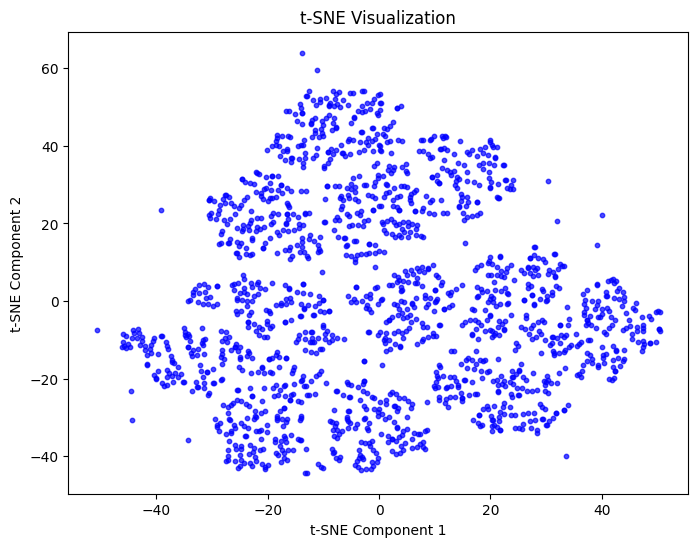

In [9]:
# run t-SNE for encoded data
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_obj[:, 0], tsne_obj[:, 1], s=10, c='blue', alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

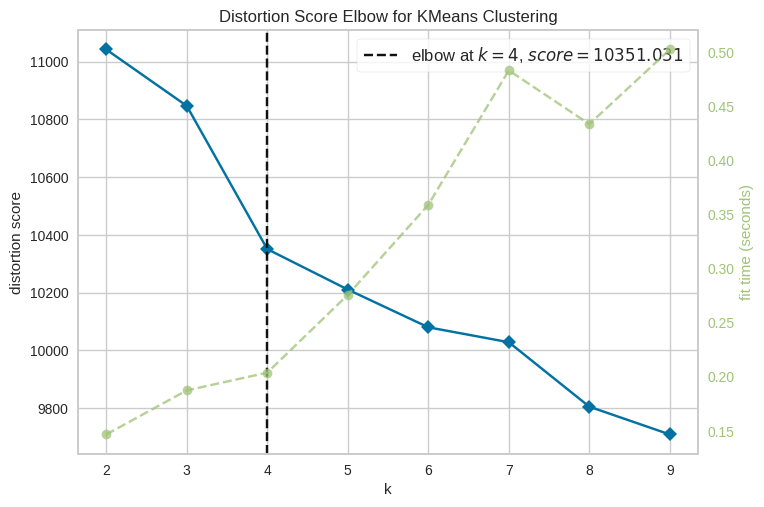

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# K Elbow choosing
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(train_data)
visualizer.show()

Silhouette Score (manhattan): 0.1319102728991955
Silhouette Score (euclidean): 0.06864968578246013
Silhouette Score (Pearson): 0.13191027289919943
Davies Bouldin Score: 3.5774525160219532


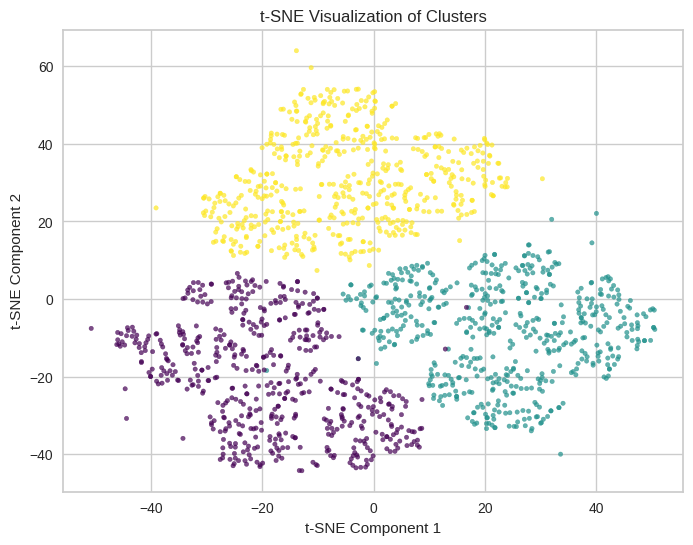

In [11]:
# Without T-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(train_data)
print(f"Silhouette Score (manhattan): {silhouette_score(train_data, kmeans.predict(train_data), metric='manhattan')}")
print(f"Silhouette Score (euclidean): {silhouette_score(train_data, kmeans.predict(train_data), metric='euclidean')}")
print(f"Silhouette Score (Pearson): {silhouette_score(pairwise_distances(train_data, metric='correlation'), kmeans.predict(train_data), metric='precomputed')}")
print(f'Davies Bouldin Score: {davies_bouldin_score(train_data, kmeans.predict(train_data))}')

# Plot the t-SNE results with KMeans labels
plt.figure(figsize=(8, 6))
plt.scatter(tsne_obj[:, 0], tsne_obj[:, 1], s=10, c=kmeans.labels_, alpha=0.7, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


Silhouette Score (manhattan): 0.46822640343422683
Silhouette Score (euclidean): 0.4713801443576813
Silhouette Score (Pearson): 0.29190883232370657
Davies Bouldin Score: 0.7429172668594616


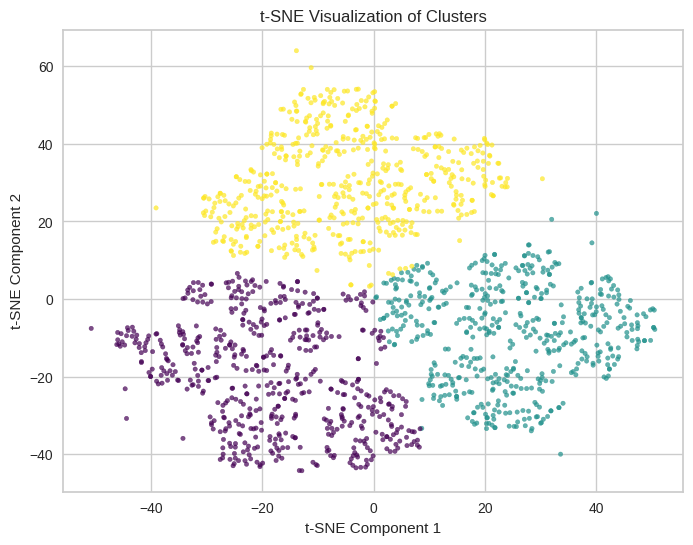

In [ ]:
# With T-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(tsne_obj)
print(f"Silhouette Score (manhattan): {silhouette_score(tsne_obj, kmeans.predict(tsne_obj), metric='manhattan')}")
print(f"Silhouette Score (euclidean): {silhouette_score(tsne_obj, kmeans.predict(tsne_obj), metric='euclidean')}")
print(f"Silhouette Score (Pearson): {silhouette_score(pairwise_distances(tsne_obj, metric='correlation'), kmeans.predict(tsne_obj), metric='precomputed')}")
print(f'Davies Bouldin Score: {davies_bouldin_score(tsne_obj, kmeans.predict(tsne_obj))}')

# Plot the t-SNE results with KMeans labels
plt.figure(figsize=(8, 6))
plt.scatter(tsne_obj[:, 0], tsne_obj[:, 1], s=10, c=kmeans.labels_, alpha=0.7, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


# Word Embedding 2

In [2]:
import pandas as pd
import numpy as np
import sklearn

In [16]:
df = pd.read_csv("dataset.csv")
df = df.fillna(np.nan)

x = df[["Major", "Personality", "Interests", "Communication_Style", "Looking_for", "Favorite_Subject", "Study_Location", "Study_Time"]].apply(lambda x: ", ".join(x.dropna()), axis=1)

# # change x to list
# x_train = []
# for i in range(len(x)):
#     x_train.append(x[i].split(", "))
# x_train[0]
x

0       DS, ENFJ, V-pop, Volleyball, Board games, Text...
1       ICT, ENTP, EDM, Board games, DIY, Movie, Netfl...
2       ICT, ESFP, Football, Cooking, Food tour, Trave...
3       ICT, ENTP, K-pop, Ballet, Dancing, Singing, Ma...
4                                                Pharmacy
                              ...                        
1630    Pharmacy, ESTP, Dancing, Anime, Text message, ...
1631    AE, ENFJ, Board games, K-pop, In-person (face-...
1632    AMS, INFP, Badminton, Investment, Swimming, St...
1633    AMS, INTP, Makeup, Anime, Politics, Board game...
1634    MST, ESTP, Food tour, Skiing, Vlogging, Board ...
Length: 1635, dtype: object

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)
m = X.toarray()


array([0.        , 0.        , 0.        , 0.20028326, 0.        ,
       0.        , 0.        , 0.1964535 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.30441392, 0.        , 0.        , 0.16728715, 0.20327055,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.32236252, 0.23611621, 0.        ,
       0.        , 0.        , 0.30976463, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.30441392, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.1964535 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [26]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(X.toarray())
tsne_obj

array([[ -5.6972604,  28.121948 ],
       [ -3.8681529,  34.989666 ],
       [ 51.198936 ,  -9.490596 ],
       ...,
       [ -4.781256 , -18.17619  ],
       [  5.098214 ,  26.29714  ],
       [ 11.754713 ,   7.9773726]], dtype=float32)

#### Without Dimensional Reduction

d:\B3\Group Project\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (Hamming): 0.05302913737461471
Silhouette Score (manhattan): 0.12434527908052673
Silhouette Score (euclidean): 0.06538259842591927
Silhouette Score (Pearson): 0.12164075070894555
Davies Bouldin Score: 4.1676793585338485


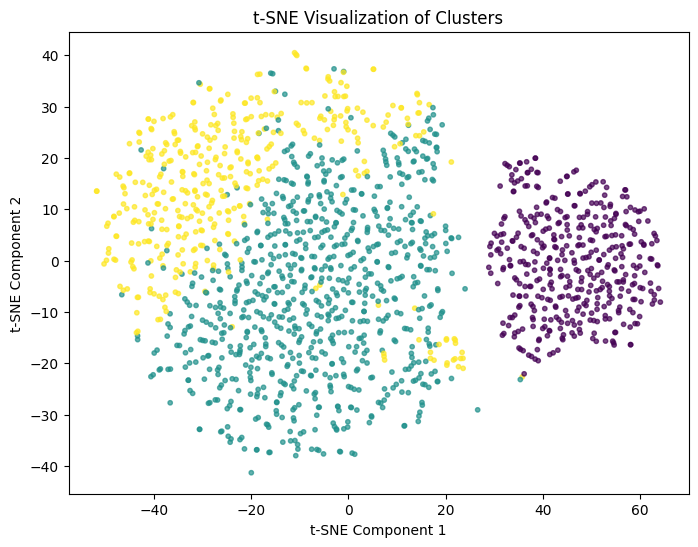

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X.toarray())
print(f"Silhouette Score (Hamming): {silhouette_score(X.toarray(), kmeans.predict(X.toarray()), metric='hamming')}")
print(f"Silhouette Score (manhattan): {silhouette_score(X.toarray(), kmeans.predict(X.toarray()), metric='manhattan')}")
print(f"Silhouette Score (euclidean): {silhouette_score(X.toarray(), kmeans.predict(X.toarray()), metric='euclidean')}")
print(f"Silhouette Score (Pearson): {silhouette_score(pairwise_distances(X.toarray(), metric='correlation'), kmeans.predict(X.toarray()), metric='precomputed')}")
print(f'Davies Bouldin Score: {davies_bouldin_score(X.toarray(), kmeans.predict(X.toarray()))}')

# Plot the t-SNE results with KMeans labels
plt.figure(figsize=(8, 6))
plt.scatter(tsne_obj[:, 0], tsne_obj[:, 1], s=10, c=kmeans.labels_, alpha=0.7, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

#### PCA

d:\B3\Group Project\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (Hamming): 0.0
Silhouette Score (manhattan): 0.815804075189143
Silhouette Score (euclidean): 0.8347444117747402
Silhouette Score (Pearson): -0.005504587155963303
Davies Bouldin Score: 0.22006418519881324


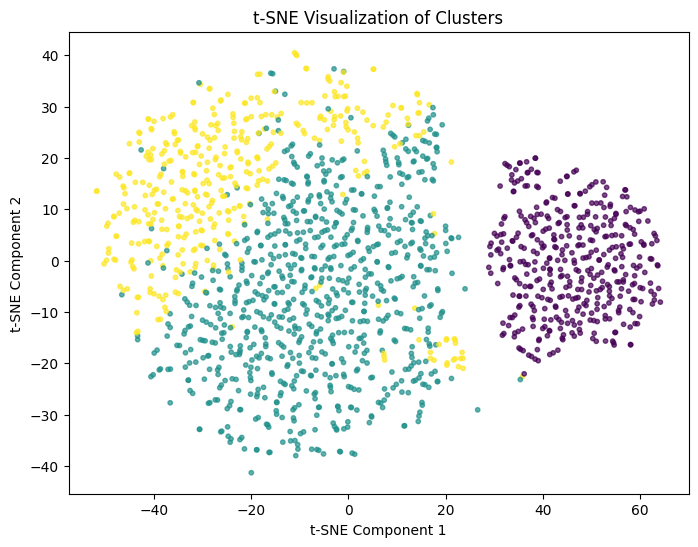

In [35]:
# With T-SNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_obj = pca.fit_transform(X.toarray())

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_obj)
print(f"Silhouette Score (Hamming): {silhouette_score(pca_obj, kmeans.predict(pca_obj), metric='hamming')}")
print(f"Silhouette Score (manhattan): {silhouette_score(pca_obj, kmeans.predict(pca_obj), metric='manhattan')}")
print(f"Silhouette Score (euclidean): {silhouette_score(pca_obj, kmeans.predict(pca_obj), metric='euclidean')}")
print(f"Silhouette Score (Pearson): {silhouette_score(pairwise_distances(pca_obj, metric='correlation'), kmeans.predict(pca_obj), metric='precomputed')}")
print(f'Davies Bouldin Score: {davies_bouldin_score(pca_obj, kmeans.predict(pca_obj))}')

# Plot the t-SNE results with KMeans labels
plt.figure(figsize=(8, 6))
plt.scatter(tsne_obj[:, 0], tsne_obj[:, 1], s=10, c=kmeans.labels_, alpha=0.7, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


# K-mode

In [14]:
import pandas as pd
import numpy as np
import sklearn

In [15]:
# !pip install kmodes

Silhouette Score (Hamming): 0.13190574882962133
Silhouette Score (manhattan): 0.13190574882962114
Davies Bouldin Score: 3.5802981043629654


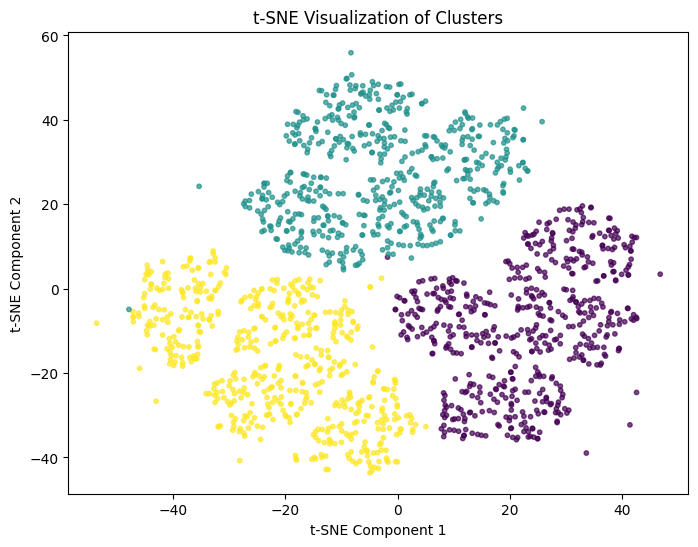

In [8]:
# k modes clustering
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

train_data = data_encoded.iloc[:, 5:]
tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(train_data)

# model
kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(train_data, categorical=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Print evaluation metrics (optional)
print(f"Silhouette Score (Hamming): {silhouette_score(train_data, clusters, metric='hamming')}")
print(f"Silhouette Score (manhattan): {silhouette_score(train_data, clusters, metric='manhattan')}")
print(f"Davies Bouldin Score: {davies_bouldin_score(train_data, clusters)}")

# Plot the t-SNE results with KMeans labels
plt.figure(figsize=(8, 6))
plt.scatter(tsne_obj[:, 0], tsne_obj[:, 1], s=10, c=clusters, alpha=0.7, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


Silhouette Score (Hamming): 0.13191644807719105
Silhouette Score (manhattan): 0.13191644807719086
Davies Bouldin Score: 3.58130434635047


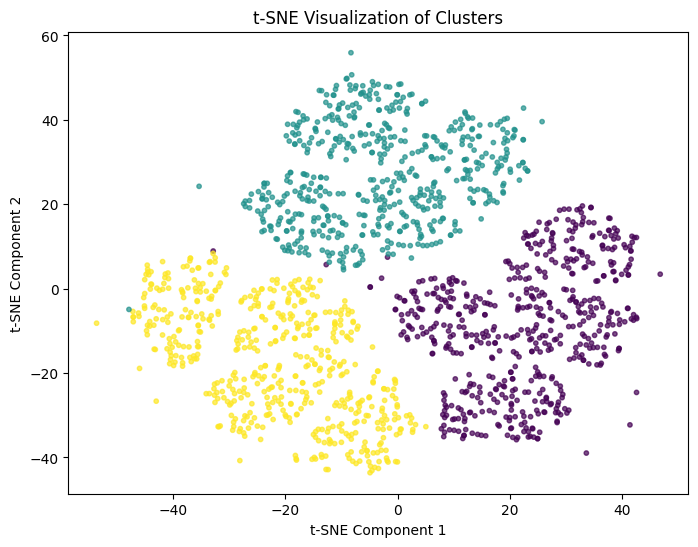

In [9]:
# K Mode
from kmodes.kmodes import KModes
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances
import matplotlib.pyplot as plt

train_data = data_encoded.iloc[:, 5:]
tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(train_data)

# Apply KMeans clustering
km = KModes(n_clusters=3, init='Cao', n_init=10)
clusters = km.fit_predict(train_data)

# Print evaluation metrics (optional)
print(f"Silhouette Score (Hamming): {silhouette_score(train_data, clusters, metric='hamming')}")
print(f"Silhouette Score (manhattan): {silhouette_score(train_data, clusters, metric='manhattan')}")
print(f"Davies Bouldin Score: {davies_bouldin_score(train_data, clusters)}")

# Plot the t-SNE results with KMeans labels
plt.figure(figsize=(8, 6))
plt.scatter(tsne_obj[:, 0], tsne_obj[:, 1], s=10, c=clusters, alpha=0.7, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


Silhouette Score (hamming): 0.1632144159880566
Davies Bouldin Score: 3.201846776883251


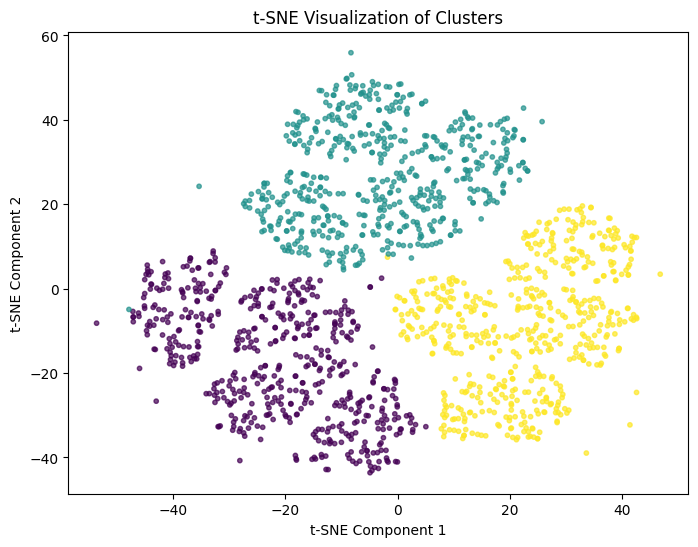

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances


new_df = pd.read_csv("dataset.csv")
new_df = new_df.fillna('')

mlp_interest = MultiLabelBinarizer()
mlp_major = MultiLabelBinarizer()
mlp_personality = MultiLabelBinarizer()
mlp_communication = MultiLabelBinarizer()
mlp_looking = MultiLabelBinarizer()
mlp_subject = MultiLabelBinarizer()
mlp_location = MultiLabelBinarizer()
mlp_time = MultiLabelBinarizer()

mlp_interest.fit(new_df['Interests'])
mlp_major.fit(new_df['Major'])
mlp_personality.fit(new_df['Personality'])
mlp_communication.fit(new_df['Communication_Style'])
mlp_looking.fit(new_df['Looking_for'])
mlp_subject.fit(new_df['Favorite_Subject'])
mlp_location.fit(new_df['Study_Location'])
mlp_time.fit(new_df['Study_Time'])

interest = mlp_interest.transform(new_df['Interests'])
major = mlp_major.transform(new_df['Major'])
personality = mlp_personality.transform(new_df['Personality'])
communication = mlp_communication.transform(new_df['Communication_Style'])
looking = mlp_looking.transform(new_df['Looking_for'])
subject = mlp_subject.transform(new_df['Favorite_Subject'])
location = mlp_location.transform(new_df['Study_Location'])
time = mlp_time.transform(new_df['Study_Time'])

new_data = np.concatenate((interest, major, personality, communication, looking, subject, location, time), axis=1)

# K Mode
from kmodes.kmodes import KModes

# Apply KMeans clustering
km = KModes(n_clusters=3, init='Huang', n_init=10)
clusters = km.fit_predict(new_data)

# Print evaluation metrics (silhouette score using hamming distance)
print(f"Silhouette Score (hamming): {silhouette_score(new_data, clusters, metric='hamming')}")
print(f'Davies Bouldin Score: {davies_bouldin_score(new_data, clusters)}')

# Plot the t-SNE results with KMeans labels
plt.figure(figsize=(8, 6))
plt.scatter(tsne_obj[:, 0], tsne_obj[:, 1], s=10, c=km.labels_, alpha=0.7, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()
